<a href="https://colab.research.google.com/github/GoldKodo/Data/blob/main/11%EC%A3%BC%EC%B0%A8_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q 한글세팅

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#실행후 세션리스타트

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and direc

워드클라우드

https://wordcloud.kr/

In [1]:
!pip install wordcloud konlpy          #wordcloud konlpy 설치

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 41.3 MB/s eta 0:00:00


In [3]:
from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib.pyplot as plt

# 텍스트 데이터 예시
text = """
한국어 자연어 처리 예제입니다.
파이썬으로 한글을 처리하여 워드클라우드를 만들어 단어의 빈도를 시각화합니다.
"""

# 형태소 분석 (Okt 사용)
#1. hannanum = Hannanum()
#2. kkma = Kkma()
#3. komoran = Komoran()
#4. okt = Okt()
### 위 4개중 원하는 형태소분석기를 사용하면 됨

okt = Okt()
tokens = okt.nouns(text)
print(tokens)

['한국어', '자연어', '처리', '예제', '파이썬', '한글', '처리', '워드', '클라우드', '단어', '빈도', '시각']


명사 추출하기 (형태소분석기) (조사 제거)

In [4]:
okt.nouns('바보멍청이똥개')

['바보', '멍청이', '똥개']

 generate 메서드는 하나의 문자열을 입력으로 받습니다. 이 문자열은 단어들로 구성되며, 각 단어는 공백으로 구분됩니다.

사용 사례: 텍스트가 이미 단어들로 나누어져 있고, 각 단어의 빈도수가 특별히 필요하지 않을 때 사용합니다. 예를 들어, 단순한 텍스트 문서를 워드클라우드로 시각화할 때 유용합니다

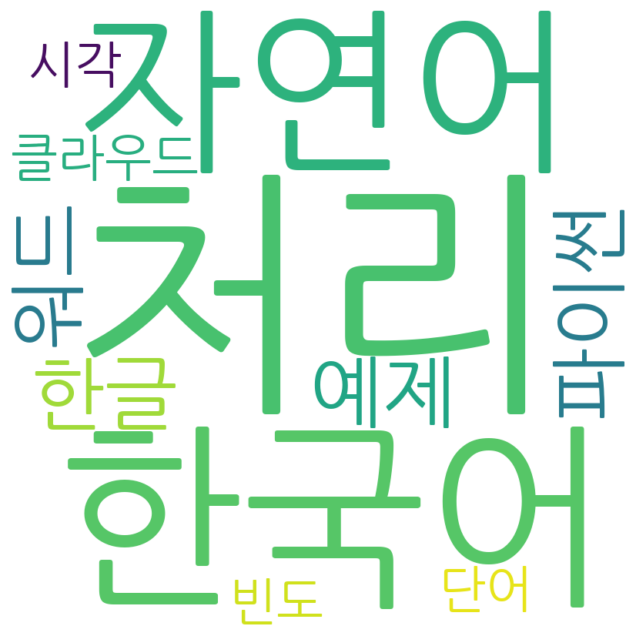

In [5]:
# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # NanumGothic 폰트 경로 설정
    width=800,
    height=800,
    background_color='white'
).generate(' '.join(tokens))

# 워드클라우드 표시
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

명사 빈도수 계산

In [6]:
from collections import Counter

# 명사 빈도수 계산
word_counts = Counter(tokens)
print(word_counts)

Counter({'처리': 2, '한국어': 1, '자연어': 1, '예제': 1, '파이썬': 1, '한글': 1, '워드': 1, '클라우드': 1, '단어': 1, '빈도': 1, '시각': 1})


generate_from_frequencies 메서드는 단어와 빈도수의 딕셔너리 (dictionary) 형태의 데이터를 입력으로 받습니다. 딕셔너리의 키는 단어이고, 값은 그 단어의 빈도수입니다.

사용 사례: 단어의 빈도수를 정확하게 반영하여 워드클라우드를 생성하고자 할 때 사용합니다. 예를 들어, 텍스트에서 특정 단어가 얼마나 자주 등장하는지를 반영한 시각화를 원할 때 유용합니다.

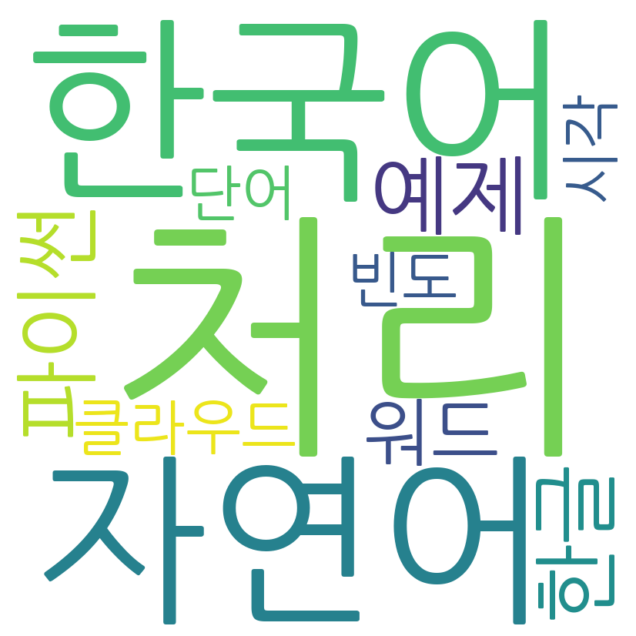

In [7]:
#word_counts = {"파이썬": 2, "한글": 1, "워드클라우드": 1, "생성": 1, "예제": 1, "텍스트": 1}
# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # NanumGothic 폰트 경로 설정
    width=800,
    height=800,
    background_color='white'
).generate_from_frequencies(word_counts)

# 워드클라우드 출력
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Mask 사용

In [8]:
# 시각화 관련
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np

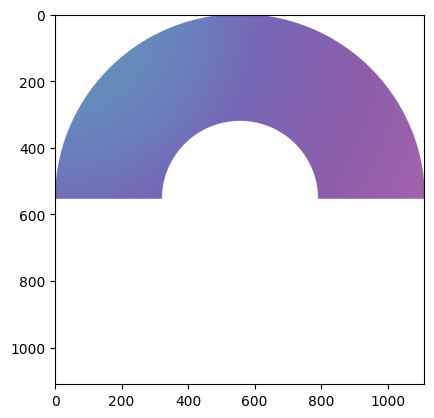

In [9]:
icon = Image.open('./그라도넛up.png')
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

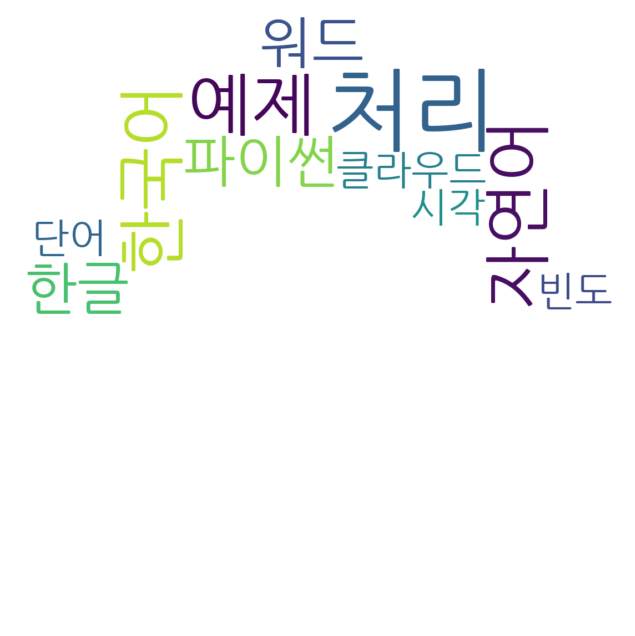

In [10]:
# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # NanumGothic 폰트 경로 설정
    width=800,
    height=800,
    background_color='white',
    mask=mask
).generate(' '.join(tokens))

# 워드클라우드 표시
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
word_counts

빈도수를 막대그래프로 그리기

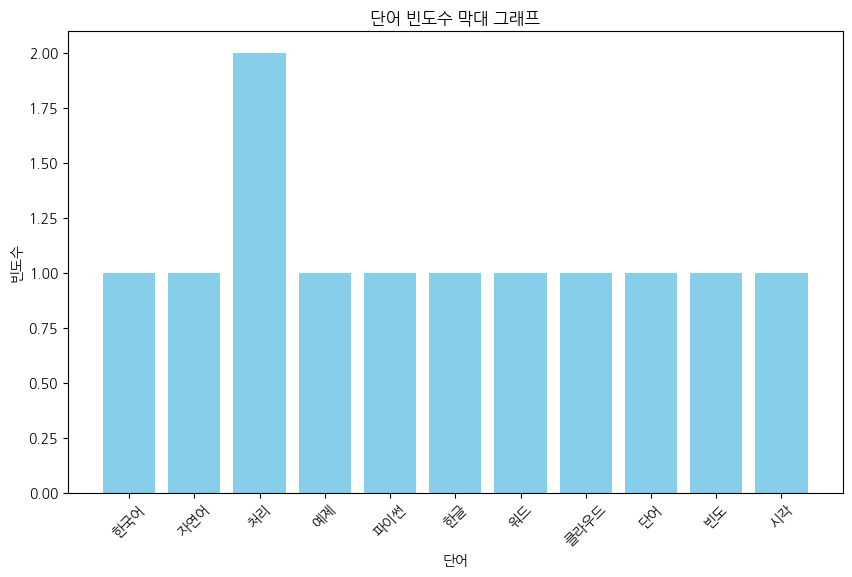

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# 워드클라우드는 딕셔너리 형태기 떄문에, 키 : 밸류 상태에서 서로 분리
words = list(word_counts.keys())
counts = list(word_counts.values())

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.rc("font", family="NanumGothic")
plt.bar(words, counts, color='skyblue')
plt.title('단어 빈도수 막대 그래프')
plt.xticks(rotation=45)
plt.show()


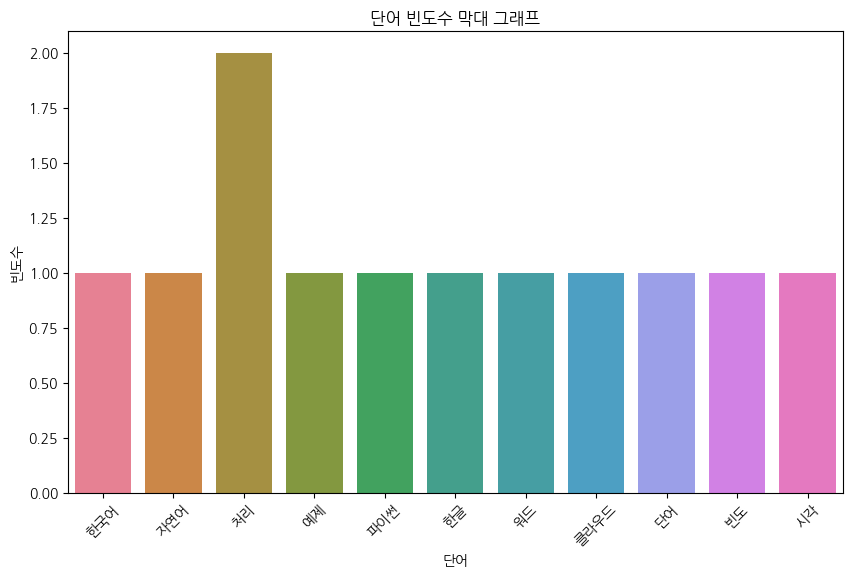

In [ ]:
import seaborn as sns
import pandas as pd
#위에서 이미 뽑아낸거 바탕으로 하는거임. 위 작업이 없으면 새로 해야함.
data = pd.DataFrame({
    '단어': words,
    '빈도수': counts
})

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='단어', y='빈도수', hue="단어", data=data)
plt.title('단어 빈도수 막대 그래프')
plt.xticks(rotation=45)
plt.show()

텍스트 파일 읽어서 워드 클라우드
1. 파일읽기
2. 단어분석하기
3. 워드클라우드 그리기

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import seaborn as sns
import pandas as pd

# txt 파일 읽기
with open('클라우드컴퓨팅.txt', 'r', encoding='utf-8') as file:
    text = file.read()

print(text)

클라우드 컴퓨팅(영어: cloud computing)은 사용자의 직접적인 활발한 관리 없이 특히, 데이터 스토리지(클라우드 스토리지)와 컴퓨팅 파워와 같은 컴퓨터 시스템 리소스를 필요시 바로 제공(on-demand availability)하는 것을 말한다. 일반적으로는 인터넷 기반 컴퓨팅의 일종으로 정보를 자신의 컴퓨터가 아닌 클라우드에 연결된 다른 컴퓨터로 처리하는 기술을 의미한다. 공유 컴퓨터 처리 자원과 데이터를 컴퓨터와 다른 장치들에 요청 시 제공해준다. 구성 가능한 컴퓨팅 자원(예: 컴퓨터 네트워크, 데이터 베이스, 서버, 스토리지, 애플리케이션, 서비스, 인텔리전스)에 대해 어디서나 접근할 수 있는, 주문형 접근(on-demand availability of computer system resources)을 가능케하는 모델이며 최소한의 관리 노력으로 빠르게 예비 및 릴리스를 가능케 한다. 클라우드 컴퓨팅과 스토리지 솔루션들은 사용자와 기업들에게 개인 소유나 타사 데이터 센터의 데이터를 저장, 가공하는 다양한 기능을 제공하며 도시를 거쳐 전 세계로까지 위치해 있을 수 있다. 클라우드 컴퓨팅은 전기망을 통한 전력망과 비슷한 일관성 및 규모의 경제를 달성하기 위해 자원의 공유에 의존한다.

지지자들은 클라우드 컴퓨팅을 통해 기업들이 선행 투자 인프라스트럭처 비용(예: 서버 구매)을 없앨 수 있다고 주장한다. 그뿐 아니라, 단체들이 컴퓨터 인프라스트럭처에 시간과 비용을 들이는 대신 핵심 사업에 집중할 수 있게 한다. 또, 클라우드 컴퓨팅을 통해 기업들이 자신들의 응용 프로그램의 기동 및 실행 속도를 더 빠르게 할 수 있게 하여 취급 용이성을 개선시키고 유지보수를 줄여줄 수 있게 도와주며 정보기술(IT) 팀들이 유동적이고 예측 불가능한 사업 수요를 충족시키기 위해 자원을 더 빠르게 조절할 수 있게 한다. 클라우드 제공자들은 일반적으로 종량제(pay as you go) 모델을 사용한다. 관리자들이 클라우드 가격 모델에 적응하지 않을 경우 예상 밖으로 높은 비용

Q
1.형태소 분석기를 이용하여 명사 추출

2.명사 빈도수 계산

3 워드클라우드 생성

4 워드클라우드 출력


Counter({'컴퓨팅': 14, '클라우드': 13, '수': 11, '컴퓨터': 8, '데이터': 5, '스토리': 5, '서비스': 5, '및': 5, '비용': 5, '자원': 4, '기업': 4, '수요': 4, '사용자': 3, '제공': 3, '모델': 3, '규모': 3, '더': 3, '관리': 2, '파워': 2, '일반': 2, '자신': 2, '다른': 2, '처리': 2, '공유': 2, '장치': 2, '예': 2, '네트워크': 2, '서버': 2, '접근': 2, '가능': 2, '케': 2, '망': 2, '위해': 2, '통해': 2, '인프라스트럭처': 2, '뿐': 2, '사업': 2, '유틸리티': 2, '성장': 2, '영어': 1, '은': 1, '직접': 1, '시스템': 1, '리소스': 1, '필요시': 1, '바로': 1, '것': 1, '말': 1, '인터넷': 1, '기반': 1, '일종': 1, '정보': 1, '연결': 1, '기술': 1, '의미': 1, '요청': 1, '시': 1, '구성': 1, '베이스': 1, '애플리케이션': 1, '인텔리전스': 1, '대해': 1, '어디': 1, '서나': 1, '주문': 1, '최소한': 1, '노력': 1, '예비': 1, '릴리스': 1, '솔루션': 1, '개인': 1, '소유': 1, '센터': 1, '저장': 1, '가공': 1, '기능': 1, '도시': 1, '전': 1, '계로': 1, '위치': 1, '통한': 1, '전력': 1, '관성': 1, '경제': 1, '달성': 1, '의존': 1, '지지자': 1, '선행': 1, '투자': 1, '구매': 1, '주장': 1, '단체': 1, '시간': 1, '대신': 1, '핵심': 1, '집중': 1, '또': 1, '응용': 1, '프로그램': 1, '기동': 1, '실행': 1, '속도': 1, '취급': 1, '용이': 1, '개선': 1, '유지': 1, '보수': 1, '정보

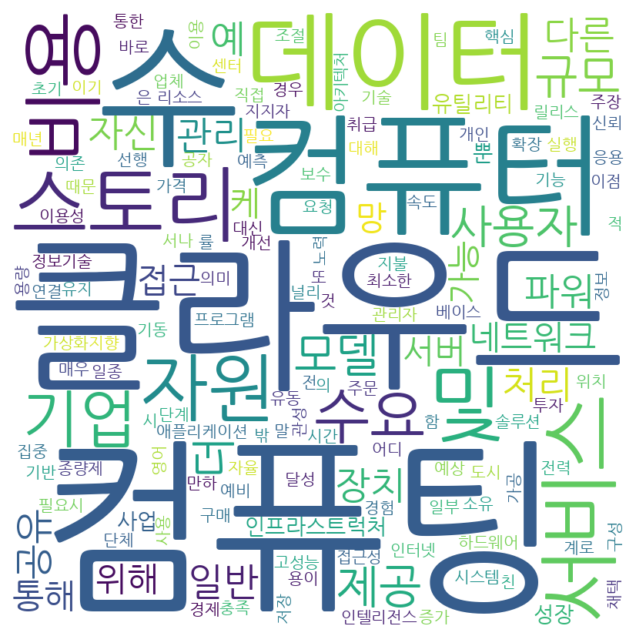

In [18]:
from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib.pyplot as plt

okt = Okt()
tokens = okt.nouns(text)

word_counts = Counter(tokens)
print(word_counts)

wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # NanumGothic 폰트 경로 설정
    width=800,
    height=800,
    background_color='white'
).generate_from_frequencies(word_counts)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Q 단어와 빈도수를 분리하여 데이터프레임 생성 해서 seaborn 막대그래프 그리기

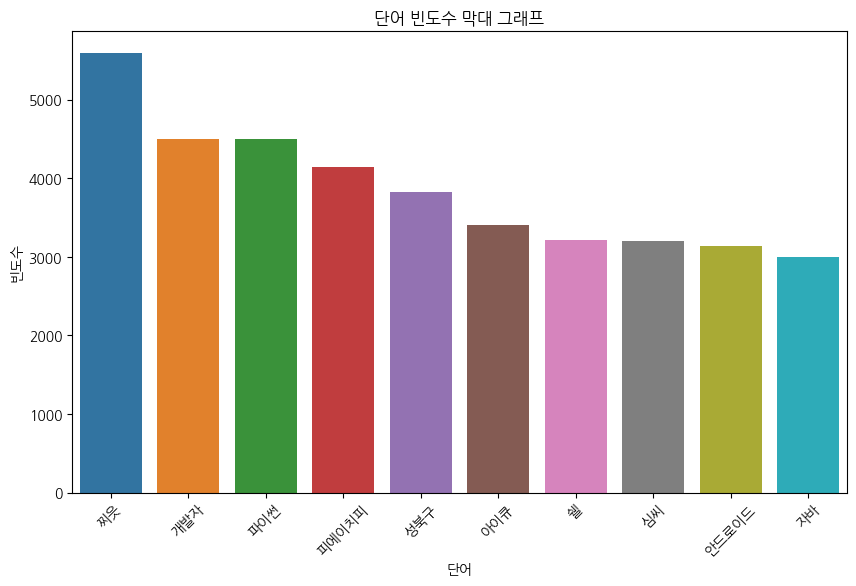

In [32]:
words = list(word_counts.keys())
counts = list(word_counts.values())

dt = pd.DataFrame({
    '단어': words,
    '빈도수': counts
})

dt10 = dt.sort_values(by = '빈도수', ascending = False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='단어', y='빈도수', hue="단어", data=dt10)
plt.title('단어 빈도수 막대 그래프')
plt.xticks(rotation=45)
plt.show()

불용어 제거

In [27]:
# 불용어 목록 정의
stopwords = set([
    '이', '그', '저', '것', '수', '들', '등', '제', '더', '그리고','및',
    '또한', '그러나', '하지만', '그러므로', '따라서', '때문에'
])

# 형태소 분석기를 이용하여 명사 추출
okt = Okt()
nouns = okt.nouns(text)

# 불용어 제거
filtered_nouns = [noun for noun in nouns if noun not in stopwords]

# 명사 빈도수 계산
word_counts = Counter(filtered_nouns)
print(word_counts)

Counter({'컴퓨팅': 14, '클라우드': 13, '컴퓨터': 8, '데이터': 5, '스토리': 5, '서비스': 5, '비용': 5, '자원': 4, '기업': 4, '수요': 4, '사용자': 3, '제공': 3, '모델': 3, '규모': 3, '관리': 2, '파워': 2, '일반': 2, '자신': 2, '다른': 2, '처리': 2, '공유': 2, '장치': 2, '예': 2, '네트워크': 2, '서버': 2, '접근': 2, '가능': 2, '케': 2, '망': 2, '위해': 2, '통해': 2, '인프라스트럭처': 2, '뿐': 2, '사업': 2, '유틸리티': 2, '성장': 2, '영어': 1, '은': 1, '직접': 1, '시스템': 1, '리소스': 1, '필요시': 1, '바로': 1, '말': 1, '인터넷': 1, '기반': 1, '일종': 1, '정보': 1, '연결': 1, '기술': 1, '의미': 1, '요청': 1, '시': 1, '구성': 1, '베이스': 1, '애플리케이션': 1, '인텔리전스': 1, '대해': 1, '어디': 1, '서나': 1, '주문': 1, '최소한': 1, '노력': 1, '예비': 1, '릴리스': 1, '솔루션': 1, '개인': 1, '소유': 1, '센터': 1, '저장': 1, '가공': 1, '기능': 1, '도시': 1, '전': 1, '계로': 1, '위치': 1, '통한': 1, '전력': 1, '관성': 1, '경제': 1, '달성': 1, '의존': 1, '지지자': 1, '선행': 1, '투자': 1, '구매': 1, '주장': 1, '단체': 1, '시간': 1, '대신': 1, '핵심': 1, '집중': 1, '또': 1, '응용': 1, '프로그램': 1, '기동': 1, '실행': 1, '속도': 1, '취급': 1, '용이': 1, '개선': 1, '유지': 1, '보수': 1, '정보기술': 1, '팀': 1, '유동': 1, '예측': 1,

json 파일 읽어서 워드 클라우드

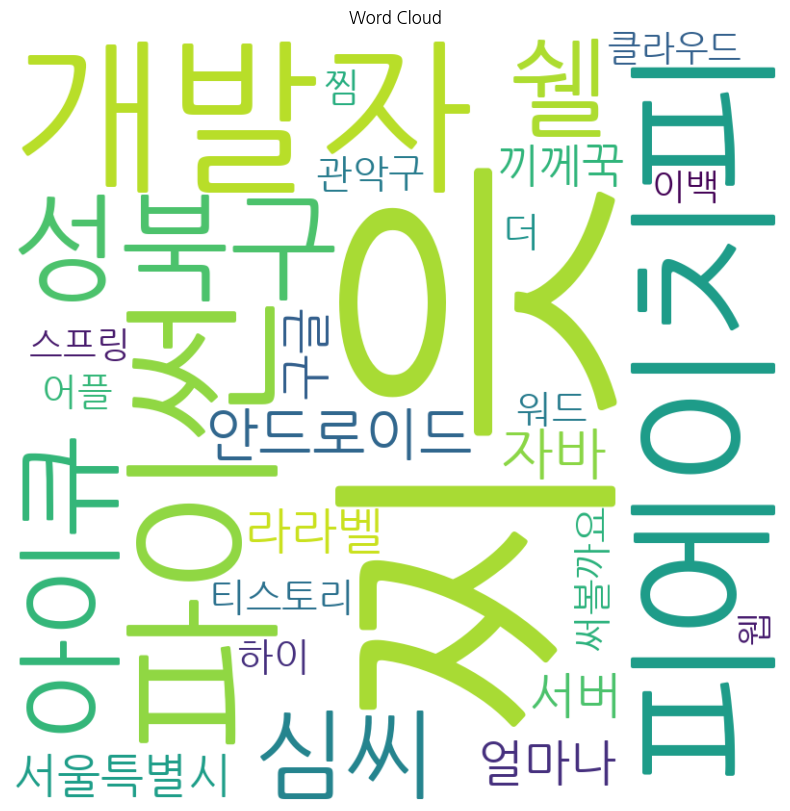

In [30]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd

# JSON 파일 읽기
with open('wordcloud.json', 'r', encoding='utf-8') as file:
    word_counts = json.load(file)

# 불용어 목록 정의
stopwords = set([
    '이', '그', '저', '것', '수', '들', '등', '제', '더', '그리고','및',
    '또한', '그러나', '하지만', '그러므로', '따라서', '때문에'
])

# 불용어 제거
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # NanumGothic 폰트 경로 설정
    width=800,
    height=800,
    background_color='white'
).generate_from_frequencies(word_counts)

# 워드클라우드 출력
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()
